In [1]:
import numpy as np
from matplotlib import pylab as plt
from importlib import reload

from gradient_approximation import *
from optimizers import *
from utils import *
from run_experiments import *

%load_ext autoreload
%autoreload 2

In [2]:
func_name = "mushrooms"
d = 112
SEED = 18

mu = 0.1
L = 2.25

args = init_experiment(func_name, d, alpha=mu)

# adding noise components
args['X'] = np.hstack((args['X'], np.random.binomial(n=1, p=np.mean(args['X'], axis=0), size=args['X'].shape)))
d = 224

np.random.seed(SEED)
x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [4]:
w_log_noise = []
w_log_true = []
g_log_noise = []
g_log_true = []
for i in range(100):
    x_0 = np.random.normal(size=d)
    x_0 = x_0 / np.linalg.norm(x_0) * 0.5
    grad = lambda x: utils.logreg_grad(x, args['X'], args['y'], alpha=args['alpha'])
    w = np.ones_like(x_0)
    w /= np.linalg.norm(w, ord=1)
    MD = MirrorDescentOnSimplex(w, grad, alpha=0.001, gamma_0=1/L, gamma=1.)
    MD.fit(x_0, max_iter=200)
    w = MD.w
    g_0 = grad(x_0)
    w_log_true.append(w[:112])
    w_log_noise.append(w[112:])
    g_log_true.append(g_0[:112])
    g_log_noise.append(g_0[112:])

Text(0.5, 1.0, 'Distribuition of w')

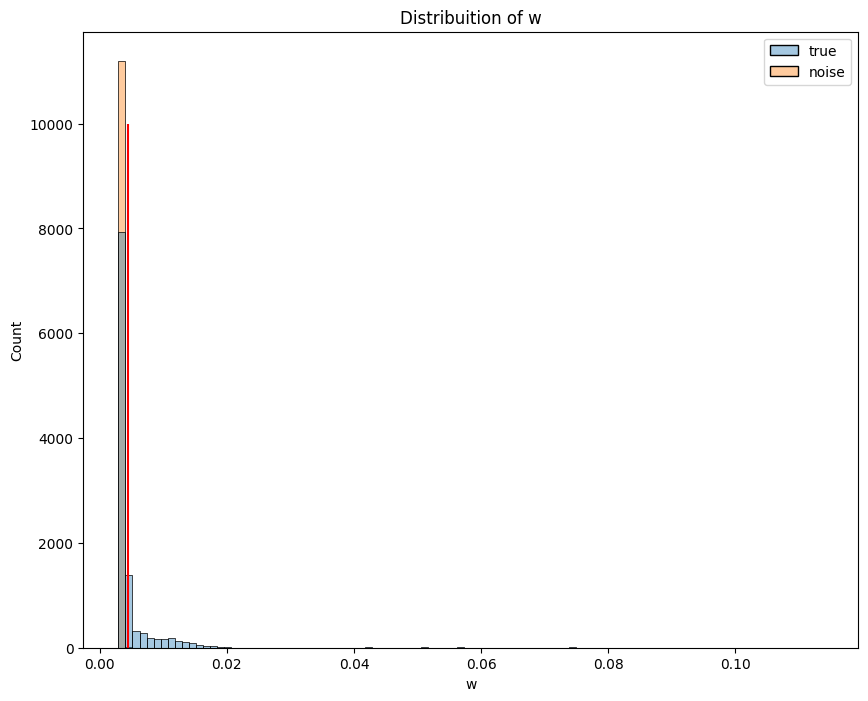

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.histplot({"true": np.array(w_log_true).flatten(), "noise": np.array(w_log_noise).flatten()}, bins=100, alpha=0.4)
plt.xlabel("w")
plt.vlines(1/d, 0, 10000, colors='red')
plt.title("Distribuition of w")

Text(0.5, 1.0, 'Distribuition of |g|')

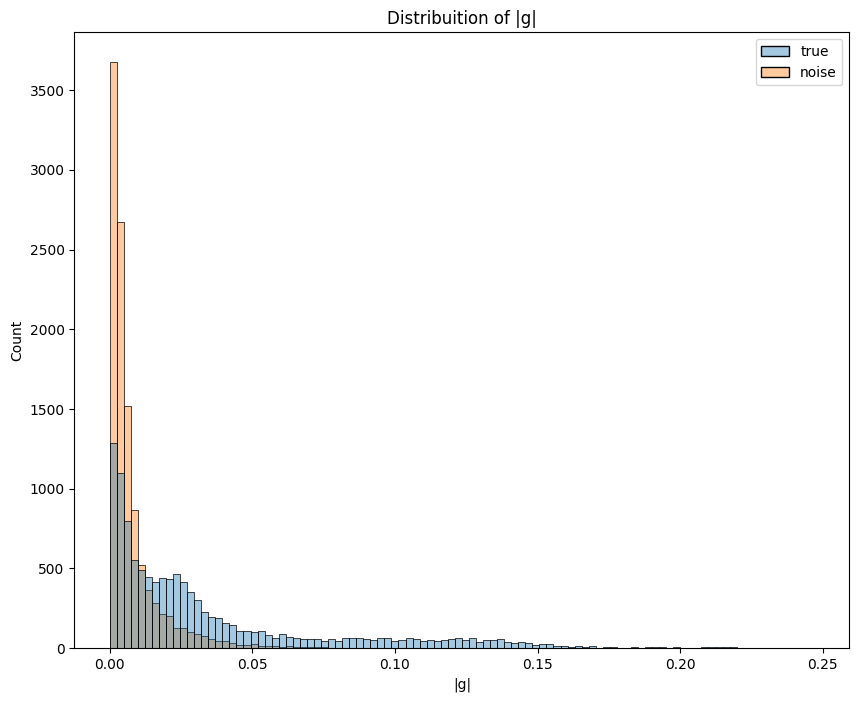

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.histplot({"true": np.abs(g_log_true).flatten(), "noise": np.abs(g_log_noise).flatten()}, bins=100, alpha=0.4)
plt.xlabel("|g|")
plt.title("Distribuition of |g|")

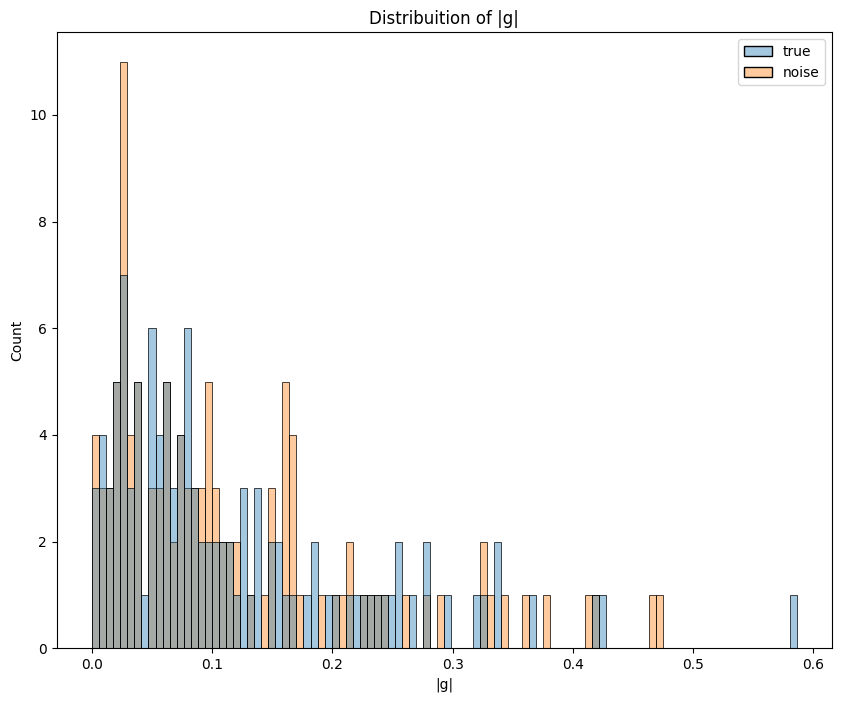

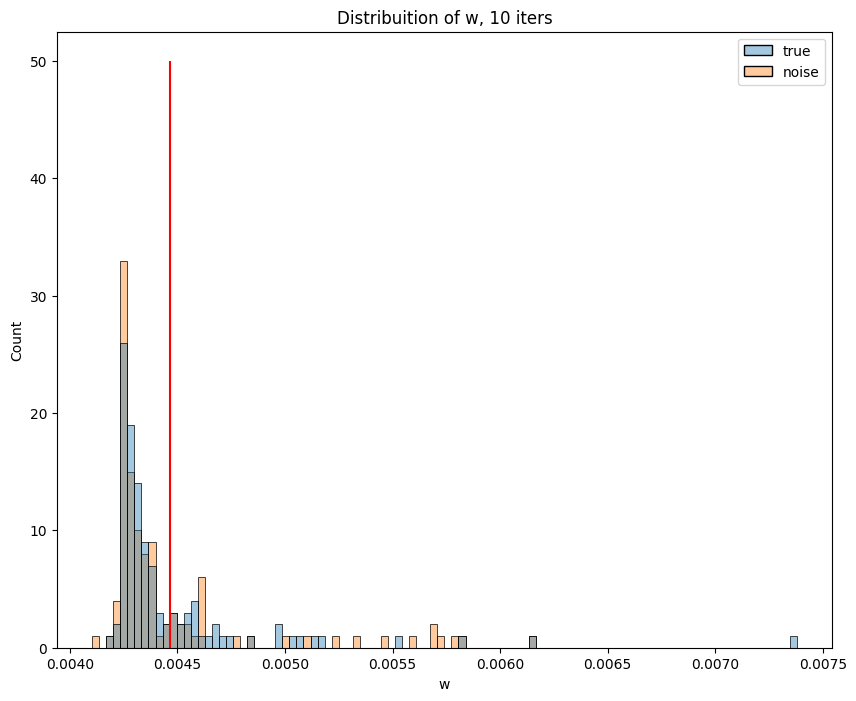

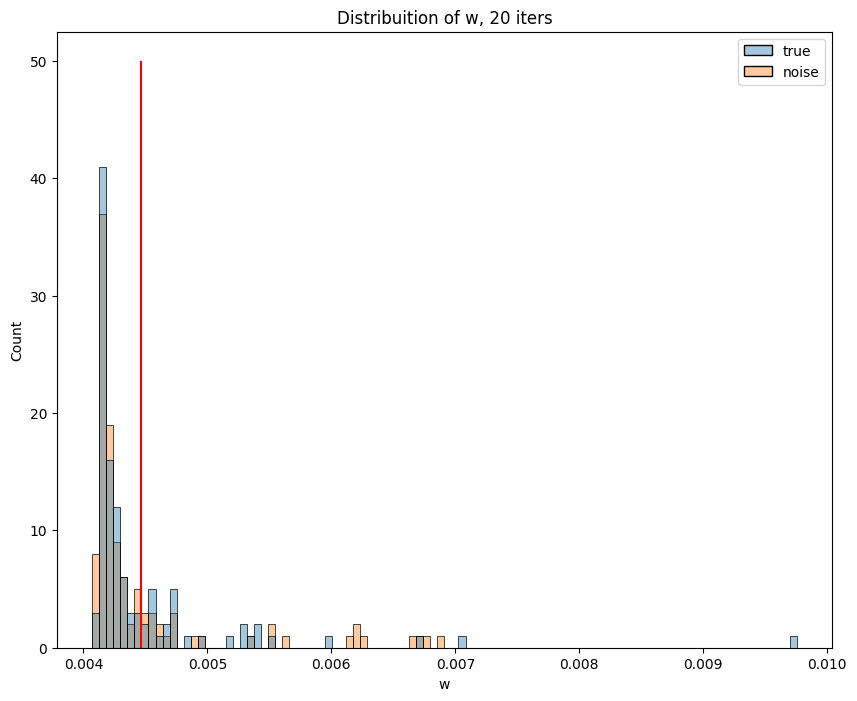

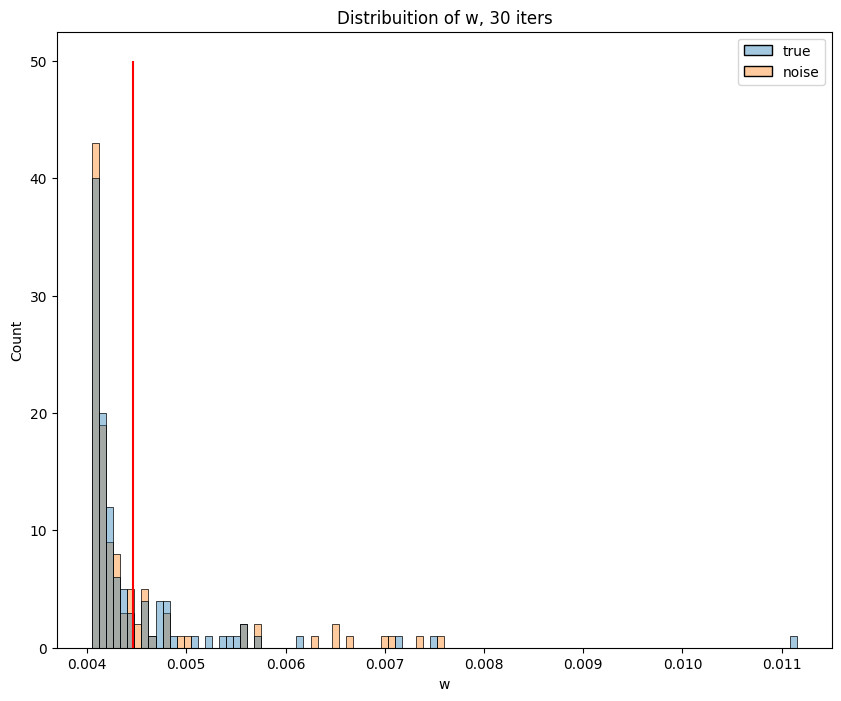

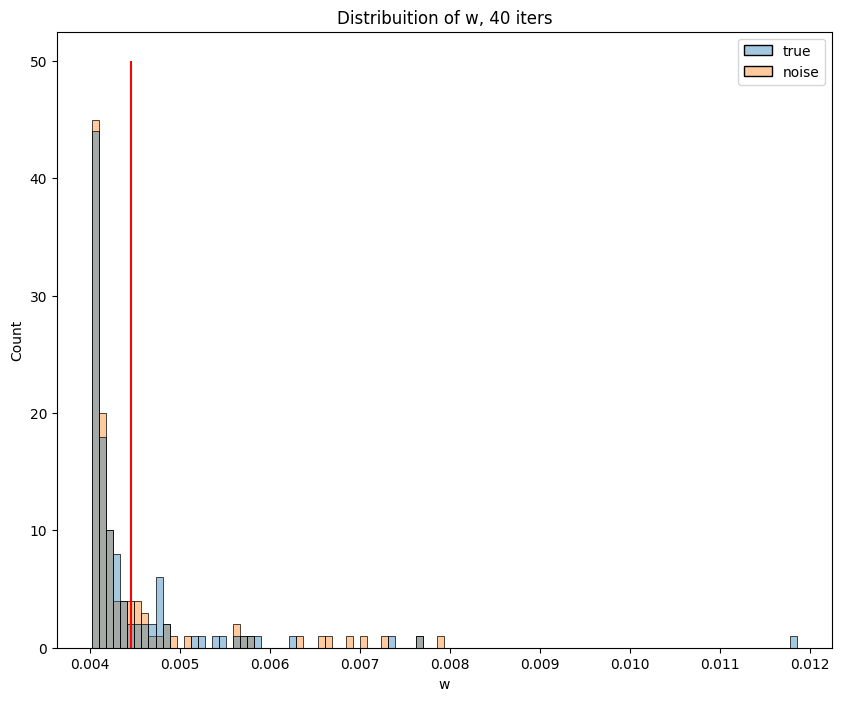

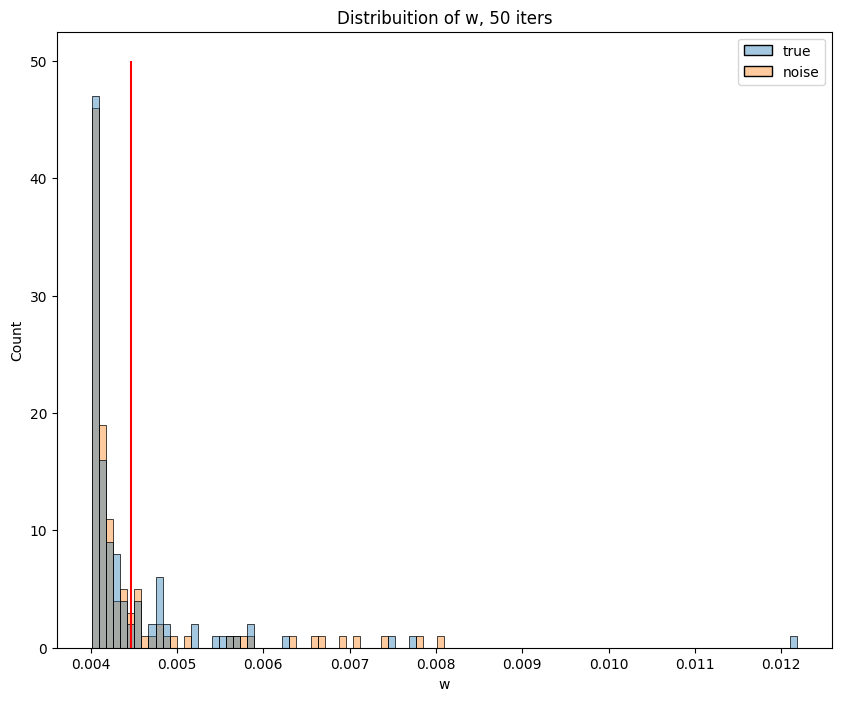

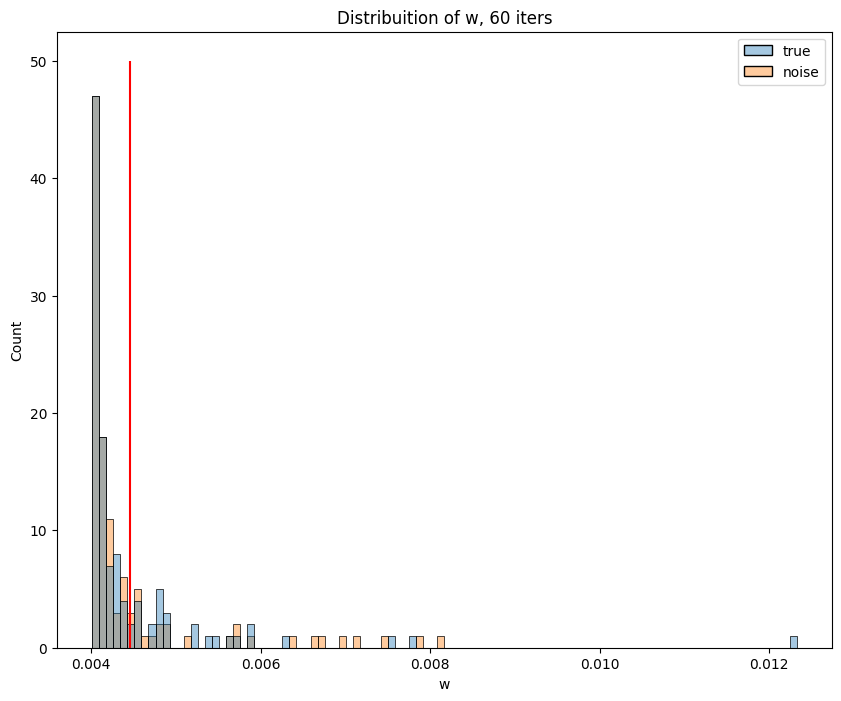

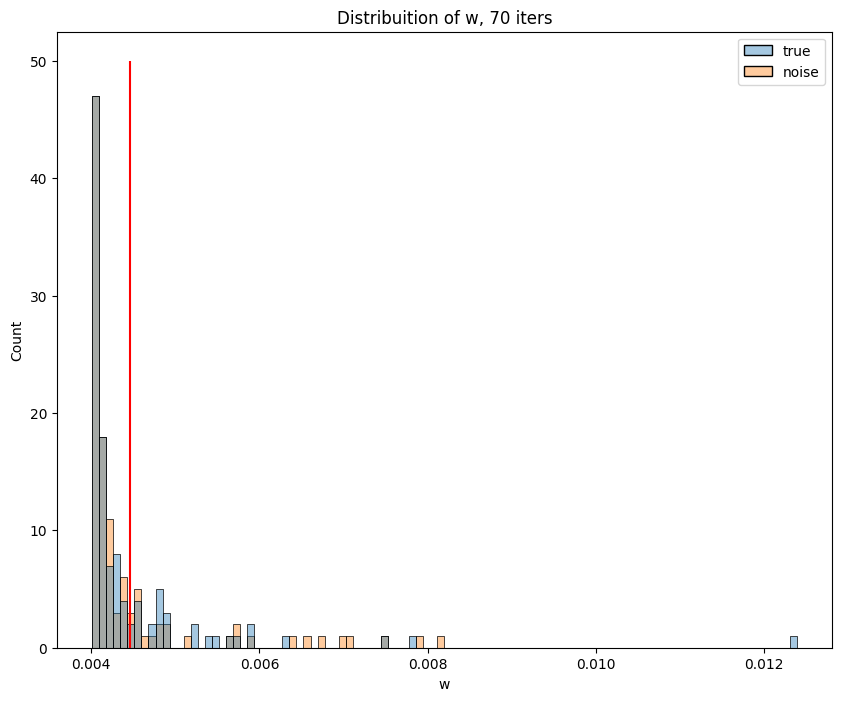

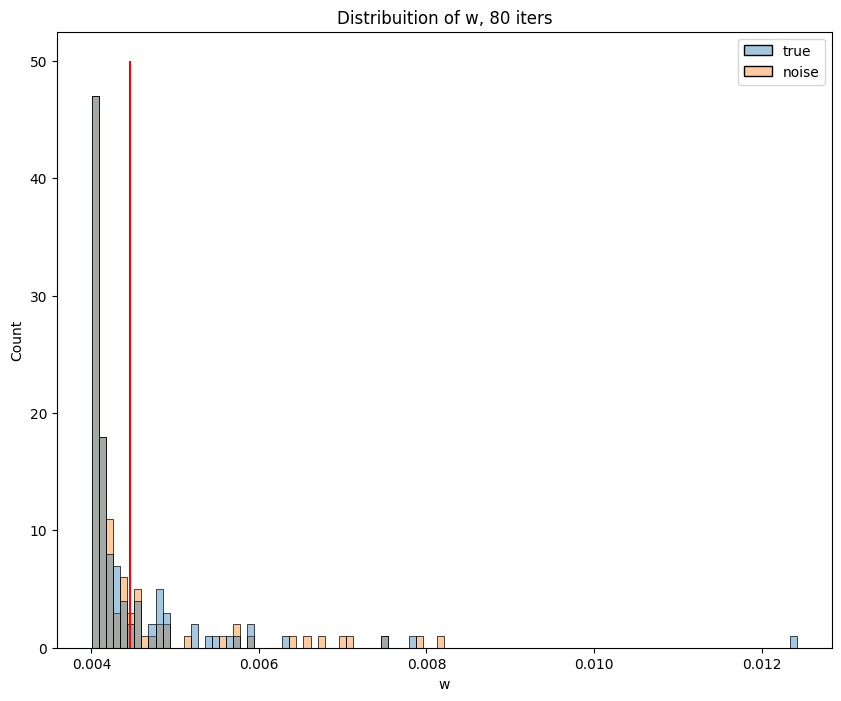

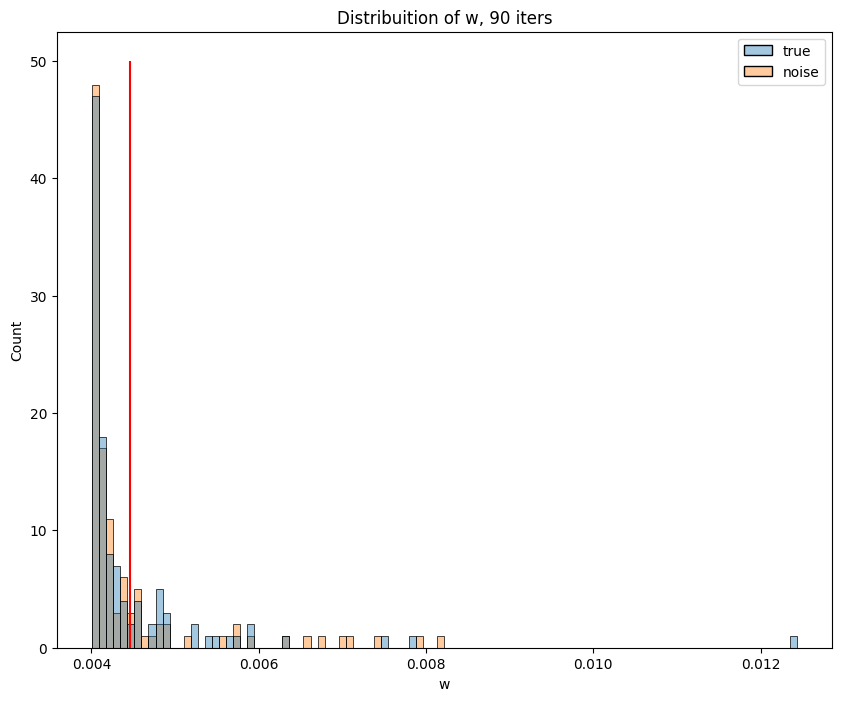

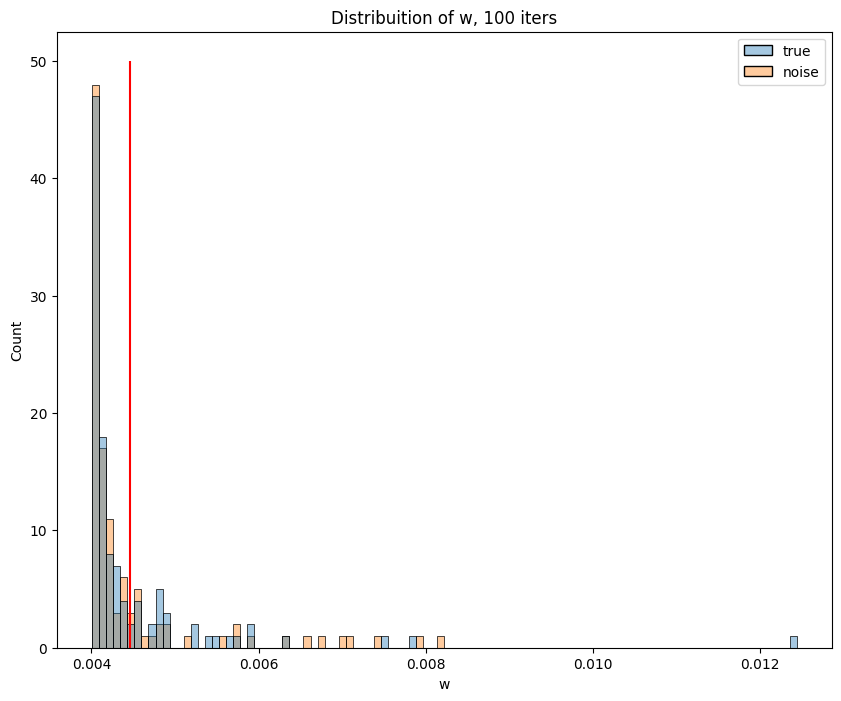

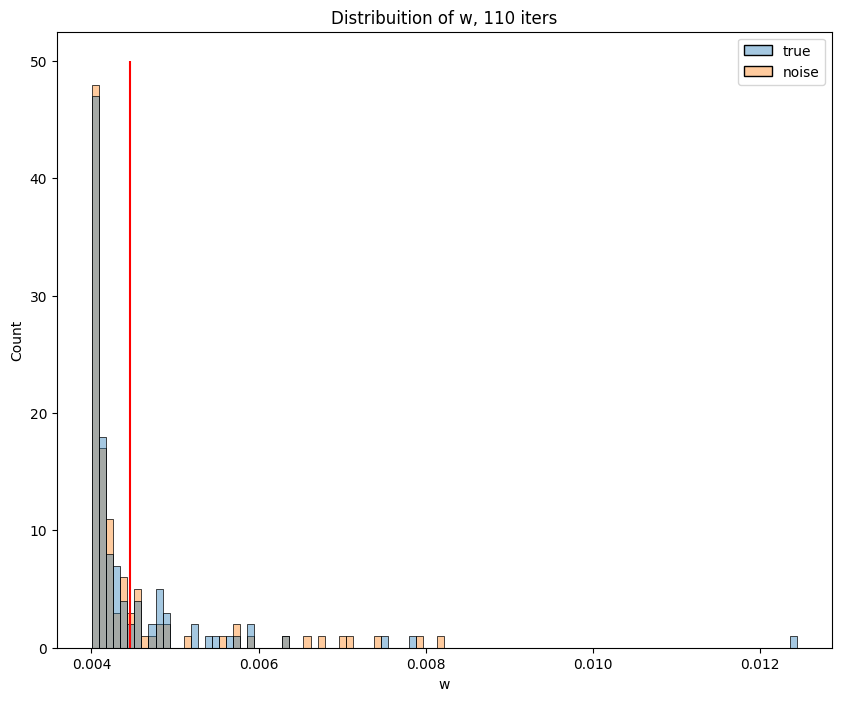

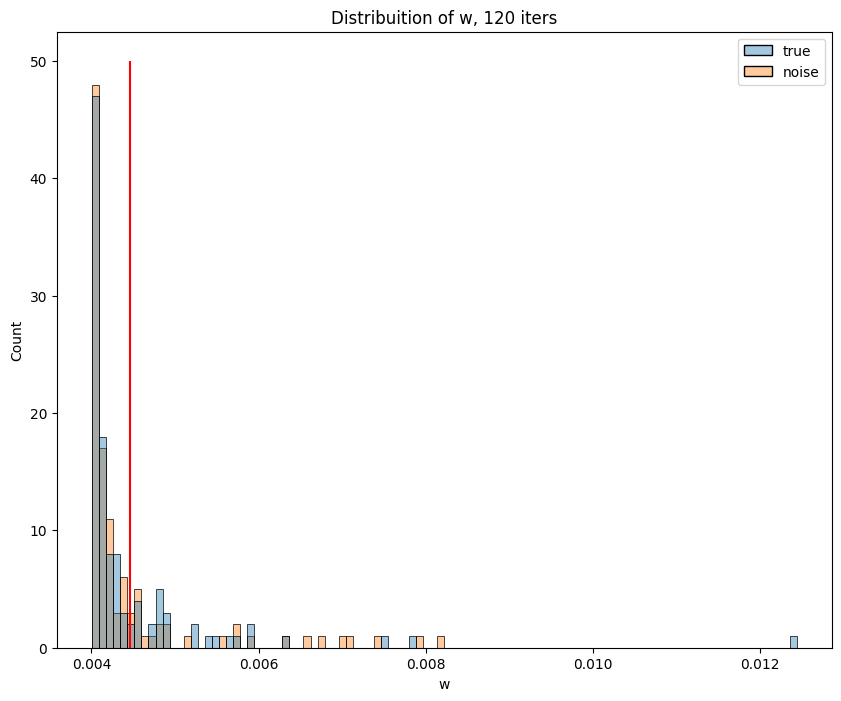

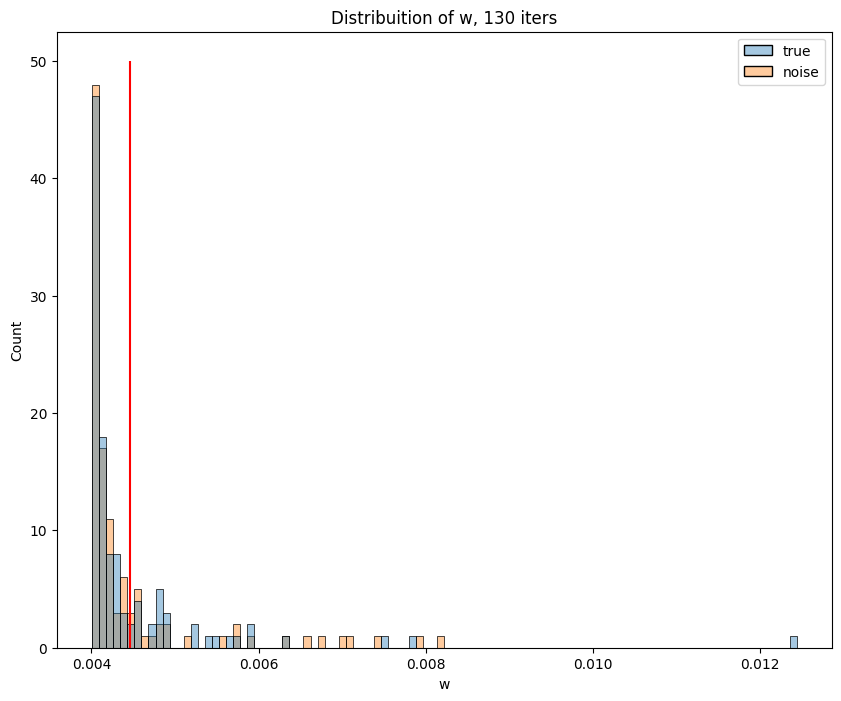

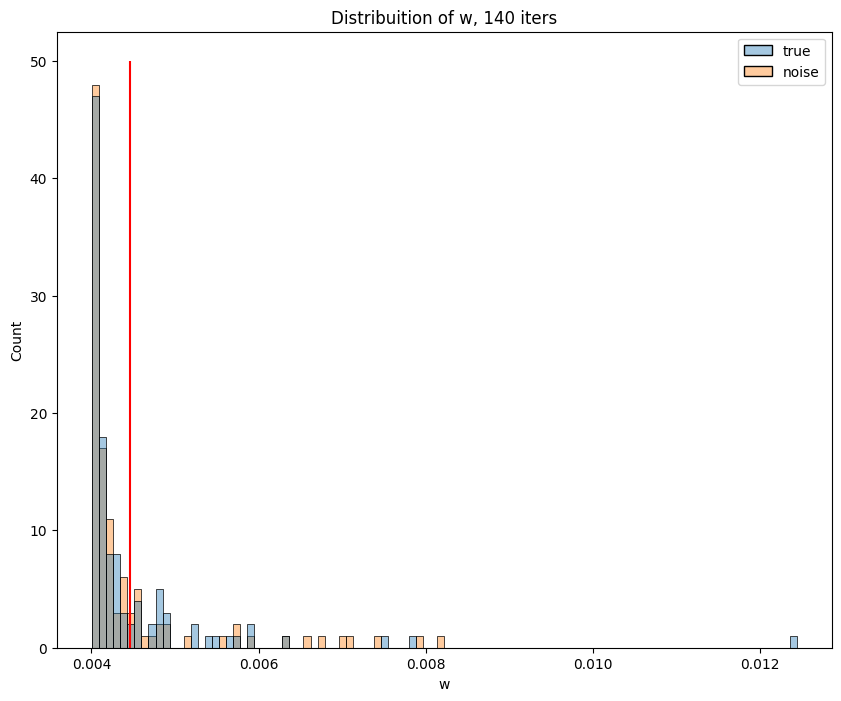

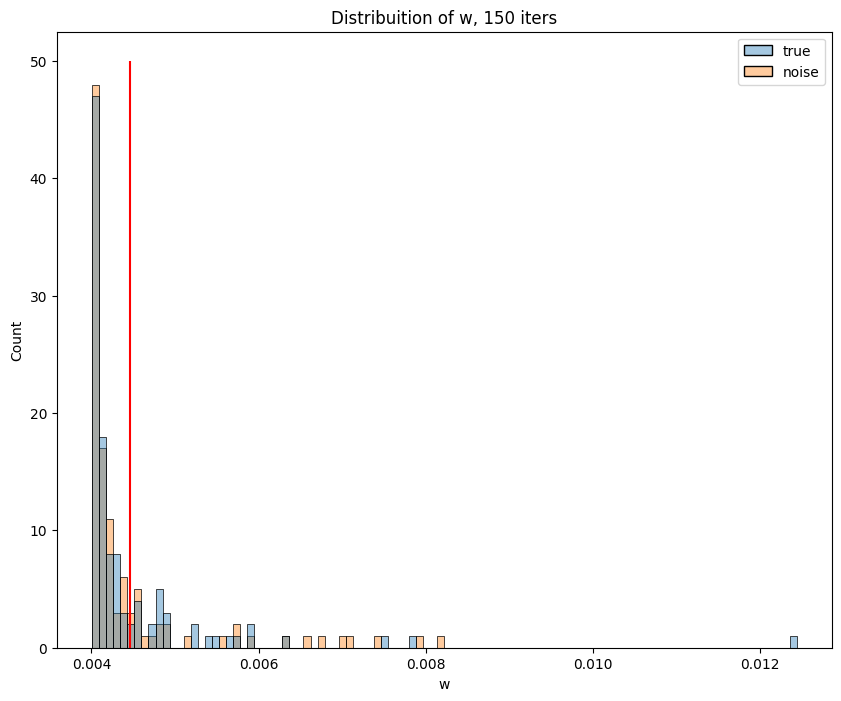

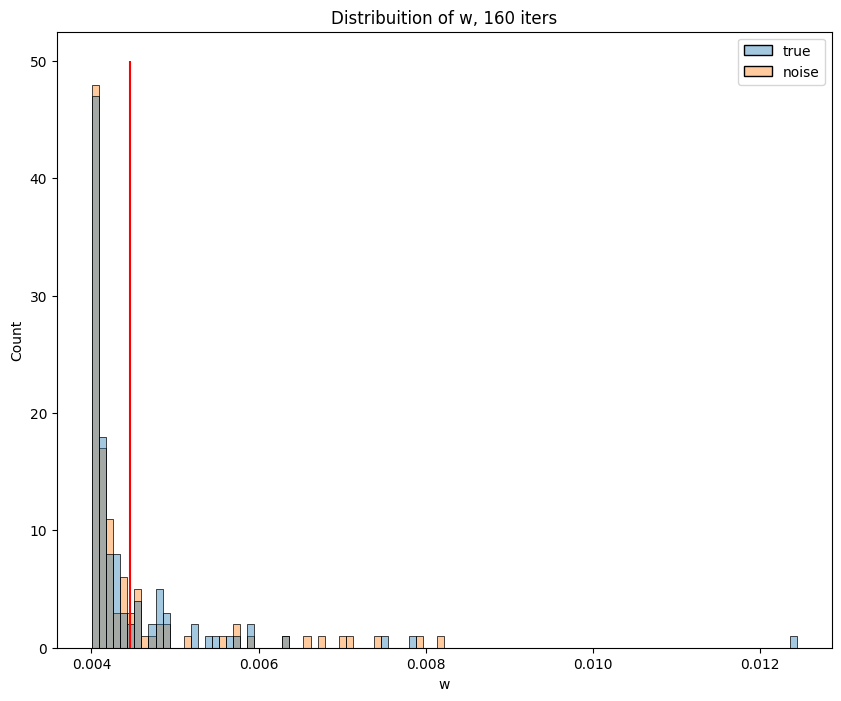

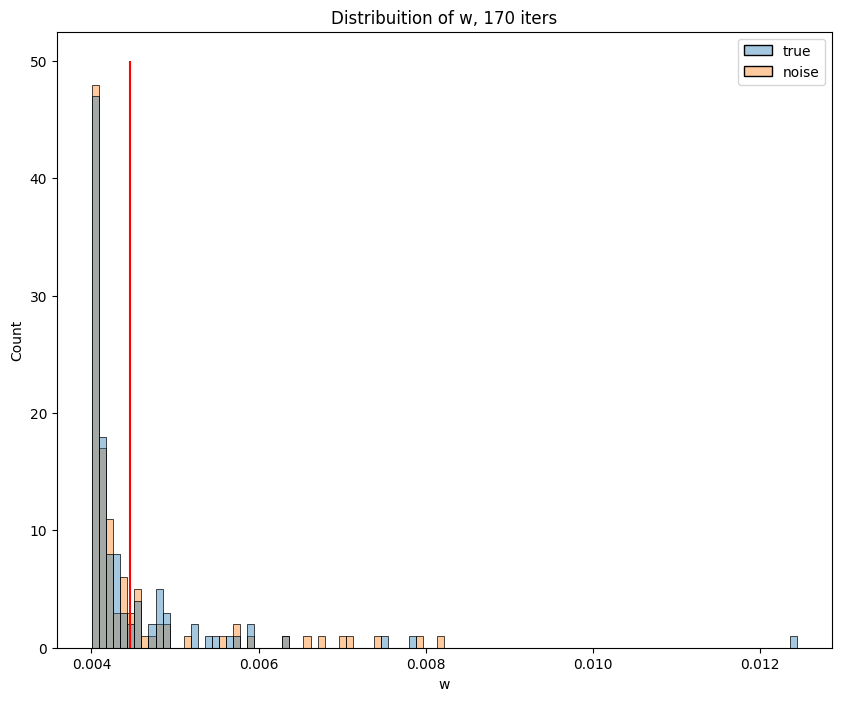

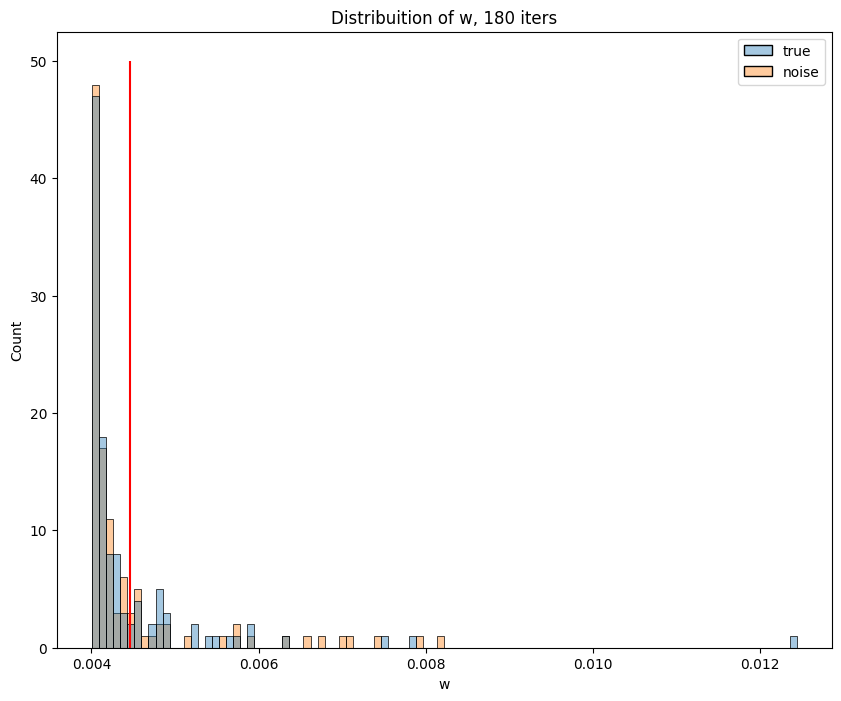

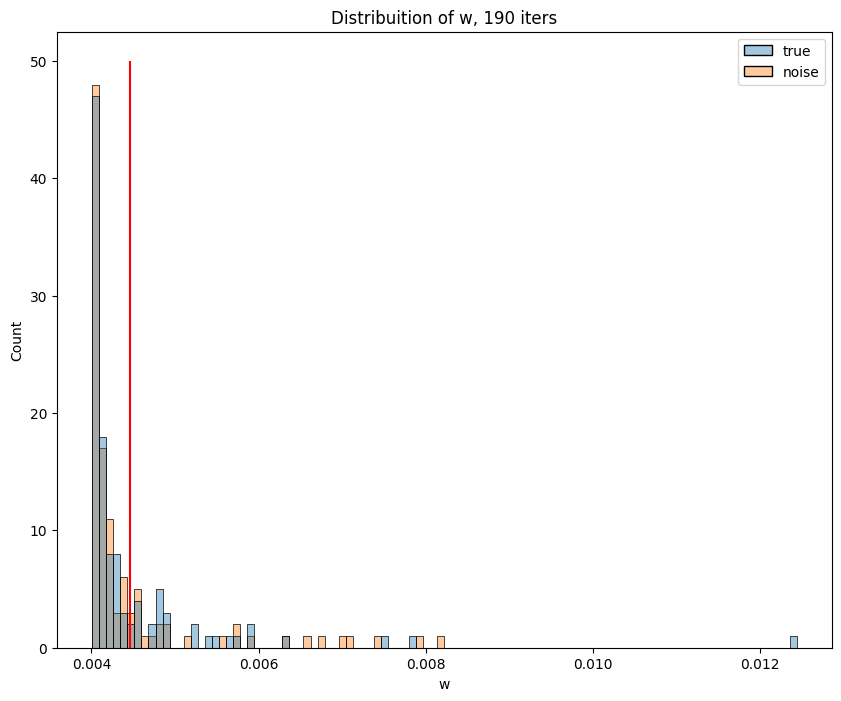

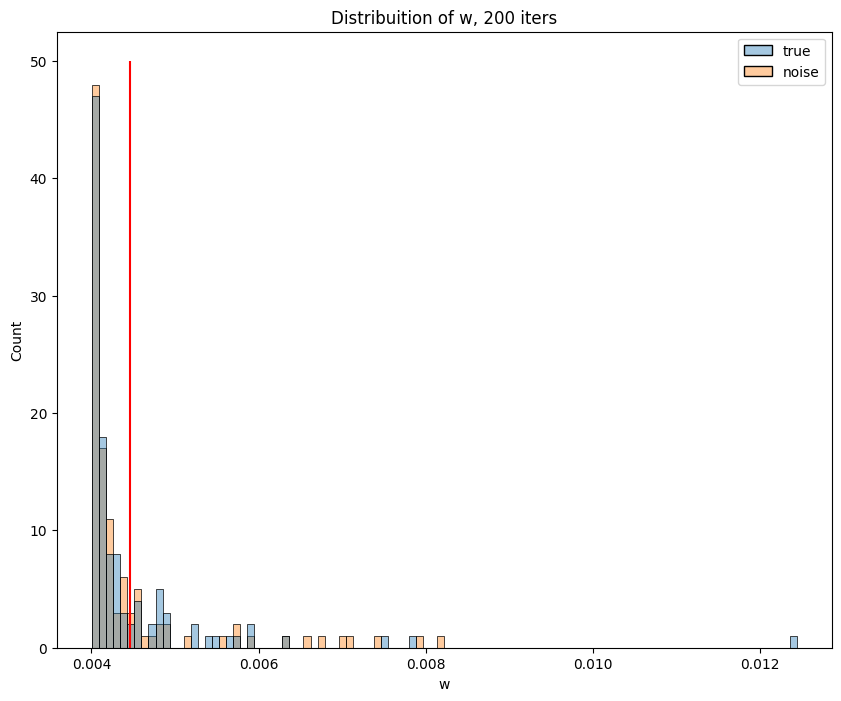

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

x_0 = np.random.normal(size=d)
grad = lambda x: utils.logreg_grad(x, args['X'], args['y'], alpha=args['alpha'])
g_0 = np.abs(grad(x_0))
g_true = g_0[:112]
g_noise = g_0[112:]
plt.figure(figsize=(10, 8))
sns.histplot({"true": g_true, "noise": g_noise}, bins=100, alpha=0.4)
plt.xlabel("|g|")
plt.title(f"Distribuition of |g|")
plt.show()    
w = np.ones_like(x_0)
w /= np.linalg.norm(w, ord=1)
MD = MirrorDescentOnSimplex(w, grad, alpha=0.1, gamma_0=1/L, gamma=1.0)
iter_step = 10
for num_checkpoints in range(20):
    MD.fit(x_0, max_iter=iter_step)
    w = MD.w
    w_true = w[:112]
    w_noise = w[112:]
    plt.figure(figsize=(10, 8))
    sns.histplot({"true": w_true, "noise": w_noise}, bins=100, alpha=0.4)
    plt.xlabel("w")
    plt.vlines(1/d, 0, 50, colors='red')
    plt.title(f"Distribuition of w, {(num_checkpoints + 1) * iter_step} iters")
    plt.show()

Text(0.5, 1.0, '|g_i|(i) in sorted order')

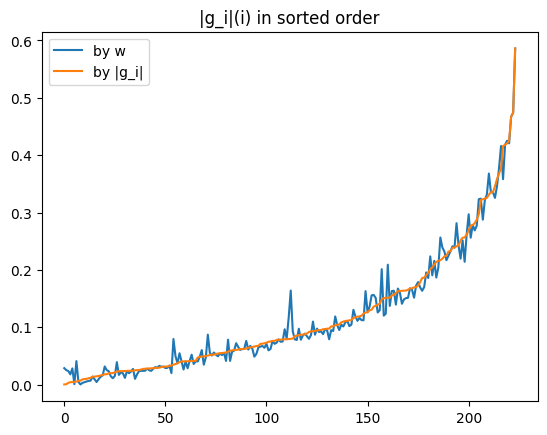

In [14]:
plt.plot(abs(g_0[np.argsort(w)]), label='by w')
plt.plot(np.sort(np.abs(g_0)), label='by |g_i|')
plt.legend()
plt.title("|g_i|(i) in sorted order")

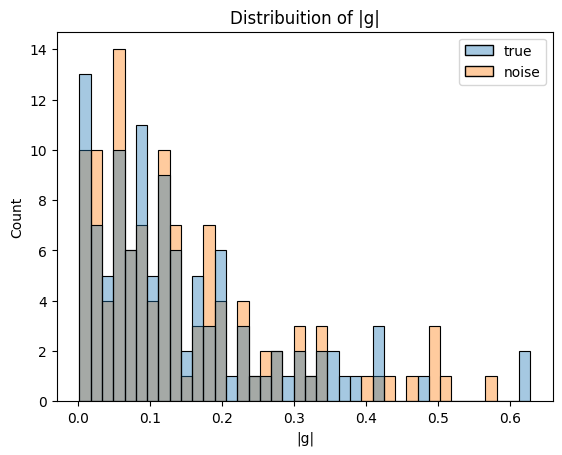

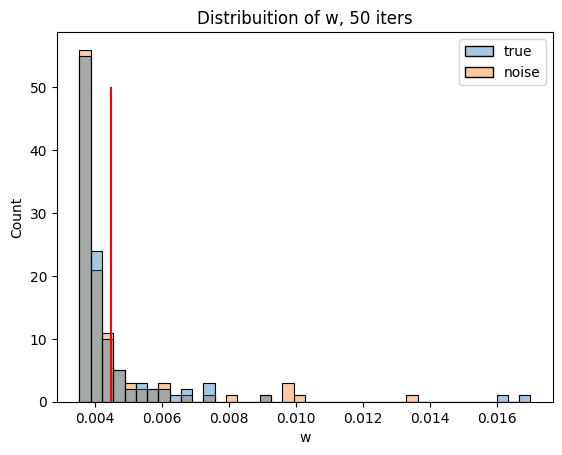

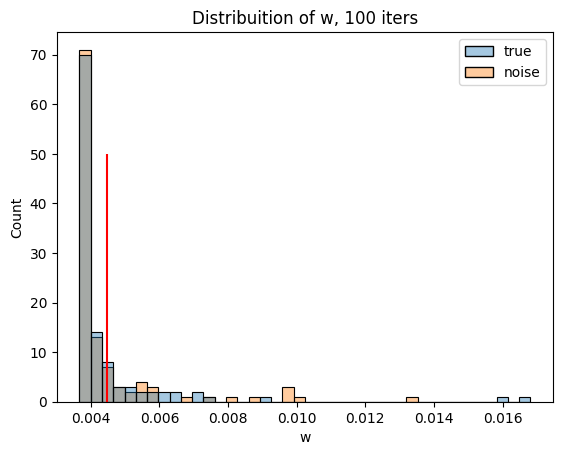

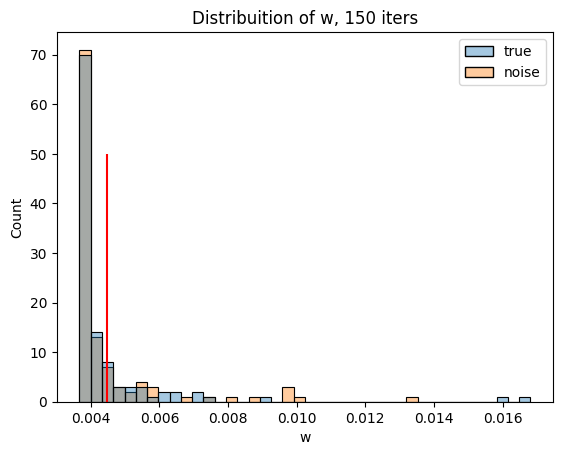

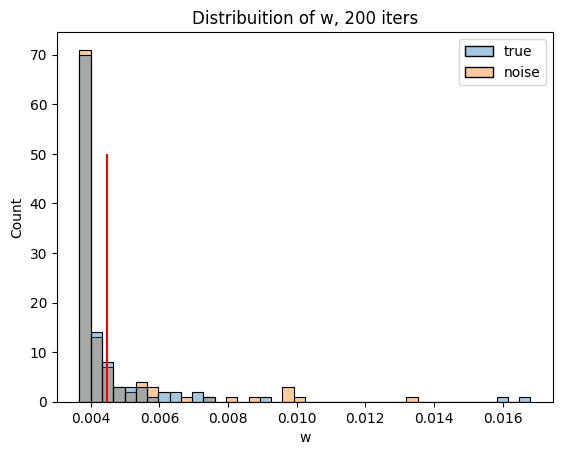

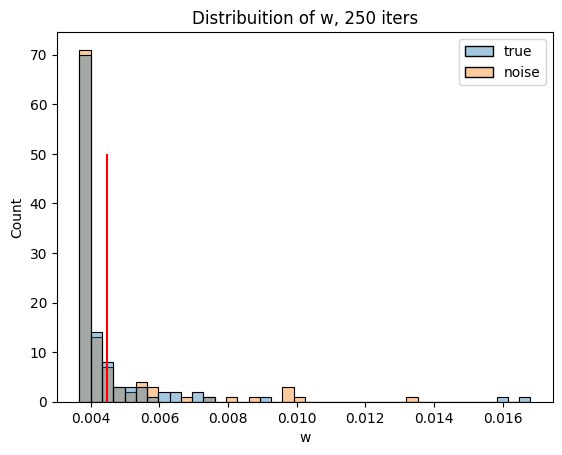

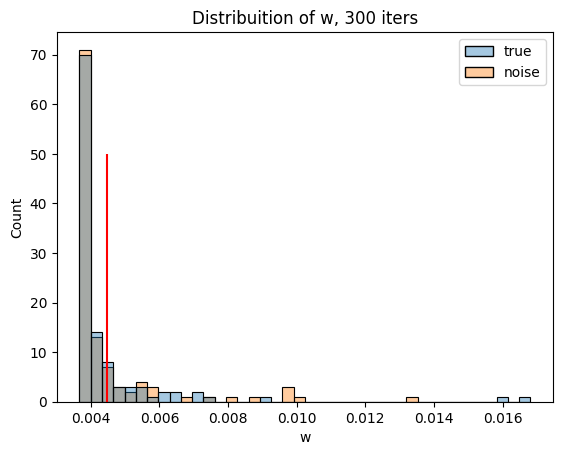

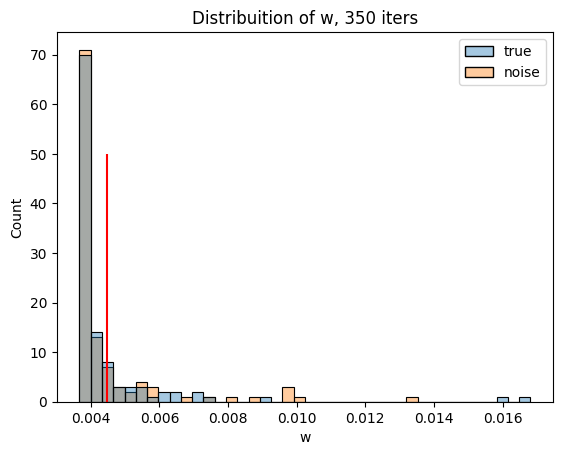

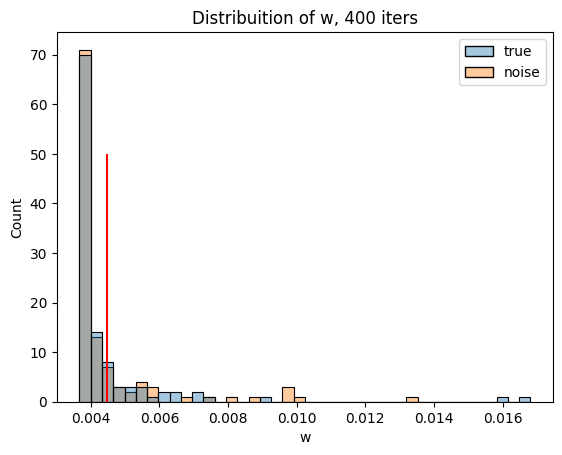

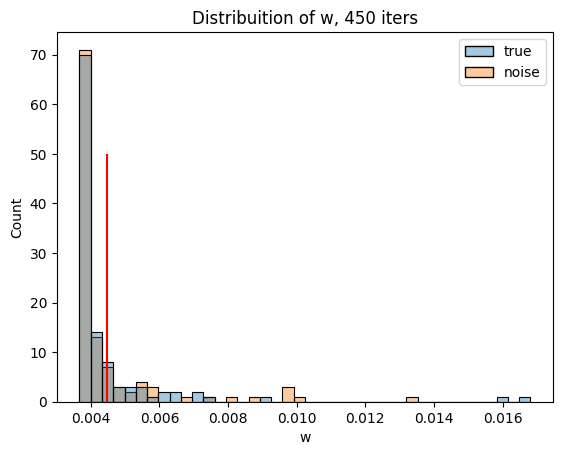

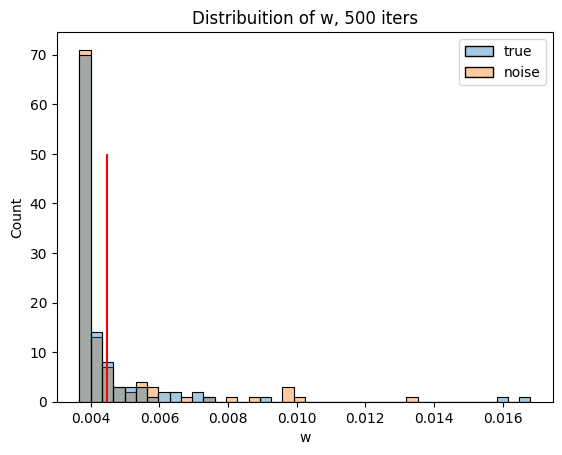

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

x_0 = np.random.normal(size=d)
grad = lambda x: utils.logreg_grad(x, args['X'], args['y'], alpha=args['alpha'])
g_0 = np.abs(grad(x_0))
g_true = g_0[:112]
g_noise = g_0[112:]
sns.histplot({"true": g_true, "noise": g_noise}, bins=40, alpha=0.4)
plt.xlabel("|g|")
plt.title(f"Distribuition of |g|")
plt.show()    
w = grad(x_0) ** 2
w /= np.linalg.norm(w, ord=1)
MD = MirrorDescentOnSimplex(w, grad, alpha=0.1, gamma_0=1/L, gamma=1.0)
iter_step = 50
for num_checkpoints in range(10):
    MD.fit(x_0, max_iter=iter_step)
    w = MD.w
    w_true = w[:112]
    w_noise = w[112:]
    sns.histplot({"true": w_true, "noise": w_noise}, bins=40, alpha=0.4)
    plt.xlabel("w")
    plt.vlines(1/d, 0, 50, colors='red')
    plt.title(f"Distribuition of w, {(num_checkpoints + 1) * iter_step} iters")
    plt.show()